In [1]:
#######################################################################################################
# portfolio = ['AVGO', 'DVN', 'GOOGL', 'QCOM', 'AAPL', 'MSFT', 'NVDA', 'TSLA', 'QQQ', 'SPY', 'PLTR']
portfolio = ['AVGO', 'DVN', 'GOOGL', 'QCOM', 'AAPL', 'MSFT', 'NVDA', 'TSLA', 'QQQ', 'SPY']
#######################################################################################################

GOOGL_____________________________________________________________________________ 



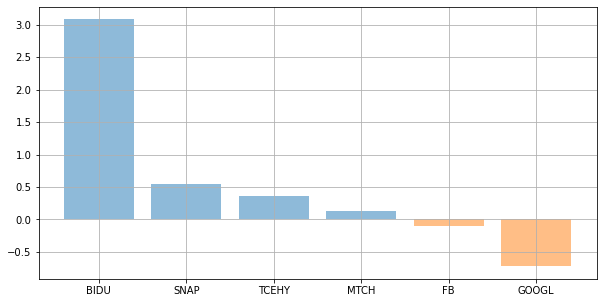

QCOM_____________________________________________________________________________ 



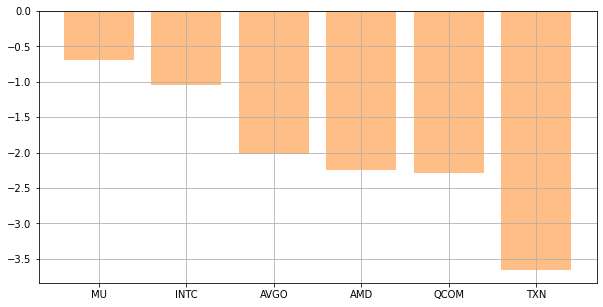

AAPL_____________________________________________________________________________ 



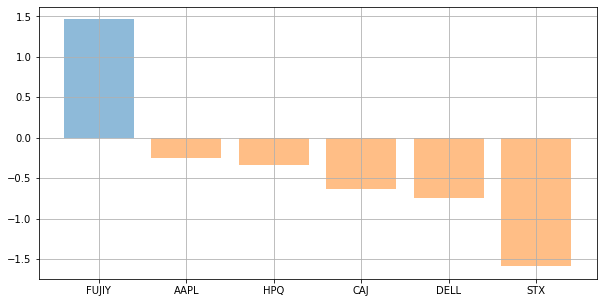

MSFT_____________________________________________________________________________ 



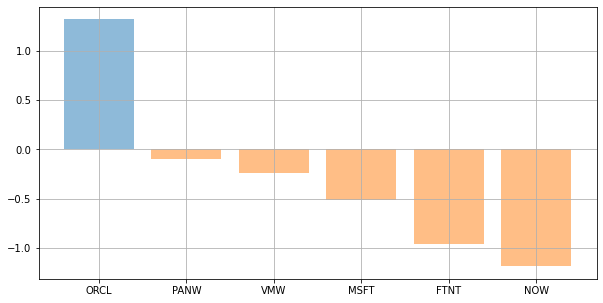

TSLA_____________________________________________________________________________ 



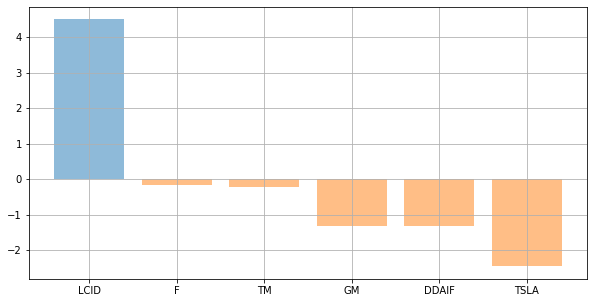

NVDA_____________________________________________________________________________ 



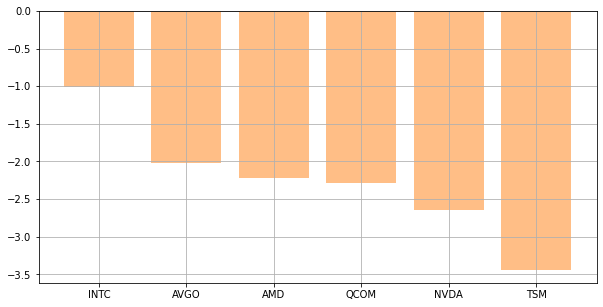

DVN_____________________________________________________________________________ 



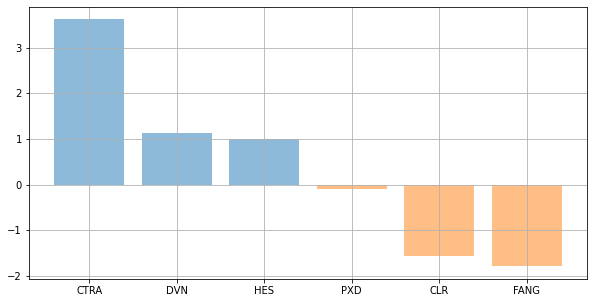

In [ ]:
import requests
import json
from bs4 import BeautifulSoup
import io
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sb
import warnings
import schedule
import time
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
np.random.seed(19680801)
pd.set_option('max_column', None)





peers = {}

peers['GOOGL'] = ['GOOGL', 'FB', 'TCEHY', 'SNAP', 'BIDU', 'MTCH']
peers['QCOM'] = ['QCOM', 'INTC', 'AMD', 'TXN', 'AVGO', 'MU']
peers['AAPL'] = ['AAPL', 'DELL', 'HPQ', 'FUJIY', 'CAJ', 'STX']
peers['MSFT'] = ['MSFT', 'ORCL', 'NOW', 'FTNT', 'PANW', 'VMW']
peers['TSLA'] = ['TSLA', 'TM', 'GM', 'DDAIF', 'F', 'LCID']
peers['NVDA'] = ['NVDA', 'TSM', 'AVGO', 'INTC', 'QCOM', 'AMD']
peers['DVN'] = ['DVN', 'HES', 'FANG', 'CLR', 'PXD', 'CTRA']





import datetime
import time
from datetime import date

def cal(start, end, peers):

    btest = None
    while btest is None: 
        try: 
            pages = []
            c = 0

            for i in peers:
                c+=1
                print(int(c/len(peers)*100),'%', end="\r")
                time.sleep(0.01)
                df = yf.download(i, start=start, end=end, progress=False).reset_index()

                df['Symbol'] = i
                pages.append(df)

            # conbine into df
            btest = pd.DataFrame()
            for i in range(len(pages)):
                btest = pd.concat([btest, pages[i]], ignore_index=True)

            btest = btest[['Date', 'Symbol', 'Close']]

        except OverflowError:
            pass

    avg = {}

    for i in btest.Symbol.unique():
        avg[i] = [btest[btest['Symbol'] == i]['Close'].mean()]

                    # Value 값을 리스트로 설정해줘야 DataFrame으로 변경된다. 

    avg = pd.DataFrame(avg)
    avg = avg.T
    avg.rename(columns = {0 : 'price'}, inplace = True)
    avg = avg.sort_values('price', ascending = False).reset_index()
    return avg

today = date.today()
now = today.strftime("%Y,%m,%d")

y = int(now[0:4])
m = int(now[5:7])
d = int(now[8:10])


for key, values in peers.items():
    
    print('\033[1m' + key + '_____________________________________________________________________________' + '\033[0m', '\n')
    yes = cal(datetime.datetime(y,m,d-1), datetime.datetime(y,m,d), values)
    tday = cal(datetime.datetime(y,m,d), datetime.datetime(y,m,d+1), values)
    result = tday.merge(yes, how = 'inner', left_on = 'index', right_on = 'index')
    result.rename(columns = {'price_x' : 'today', 'price_y' : 'yesterday'}, inplace = True)
    result['%change'] = (result['today'] - result['yesterday']) / result['yesterday'] *100
    result.sort_values('%change', inplace = True)
    key = result.copy()

    gain = key[key['%change'] >= 0].sort_values('%change', ascending = False)
    loss = key[key['%change'] < 0].sort_values('%change', ascending = False)

    plt.figure(figsize = (10,5))
    plt.bar(gain['index'], gain['%change'], alpha = 0.5)
    plt.bar(loss['index'], loss['%change'], alpha = 0.5)

    plt.grid(axis = 'x')
    plt.grid(axis = 'y')

    plt.show()

    


# Set Start and End 
import datetime
import time
from datetime import date

sent = []
t_y  = [5]

def schedules():

    def cal(start, end):

        btest = None
        while btest is None: 
            try: 
                pages = []
                c = 0

                for i in portfolio:
                    c+=1
                    print(int(c/len(portfolio)*100),'%', end="\r")
                    time.sleep(0.01)
                    df = yf.download(i, start=start, end=end, progress=False).reset_index()

                    df['Symbol'] = i
                    pages.append(df)

                # conbine into df
                btest = pd.DataFrame()
                for i in range(len(pages)):
                    btest = pd.concat([btest, pages[i]], ignore_index=True)

                btest = btest[['Date', 'Symbol', 'Close']]

            except OverflowError:
                pass

        avg = {}

        for i in btest.Symbol.unique():
            avg[i] = [btest[btest['Symbol'] == i]['Close'].mean(), np.std(btest[btest['Symbol'] == i]['Close'])]

                        # Value 값을 리스트로 설정해줘야 DataFrame으로 변경된다. 

        avg = pd.DataFrame(avg)
        avg = avg.T
        avg.rename(columns = {0 : 'price', 1 : 'std'}, inplace = True)
        avg = avg.sort_values('price', ascending = False).reset_index()
        return avg


    today = date.today()
    now = today.strftime("%Y,%m,%d")

    y = int(now[0:4])
    m = int(now[5:7])
    d = int(now[8:10])

############################################
    start = datetime.datetime(2021,7,d)
    end = datetime.datetime(y,m,d)
    average = cal(start, end)
############################################
    start = datetime.datetime(y,m,d-1)
    end = datetime.datetime(y,m,d)
    yesterday = cal(start, end)

    start = datetime.datetime(y,m,d)
    end = datetime.datetime(y,m,d+1)
    today = cal(start, end)

    result = today.merge(yesterday, how = 'inner', left_on = 'index', right_on = 'index')
    result = result.merge(average, how = 'inner', left_on = 'index', right_on = 'index')
    result = result.drop(columns = ['std_x', 'std_y'])
    result.rename(columns = {'price_x' : 'today', 'price_y' : 'yesterday', 'price' : 'average'}, inplace = True)
    result['today_yesterday'] = (result['today'] - result['yesterday']) / result['yesterday'] *100
    norm = []
    for i in result['index']:
        #########################################################################################################################################     
        norm.append(np.percentile(np.random.normal(result[result['index'] == i]['average'], result[result['index'] == i]['std'], 10000000), 10))
        #########################################################################################################################################  
    result['norm'] = norm    
    
    result.to_csv('trigger.csv', index = False)

    import smtplib, ssl

    port = 465  # For SSL
    smtp_server = "smtp.gmail.com"
    sender_email = "aicpasean@gmail.com"  # Enter your address
    receiver_email = "aicpasean@gmail.com"  # Enter receiver address
    password = 

    
    for stock in result.sort_values('today_yesterday')['index']:
        
        if sum(sent) == 5:
            
            df = pd.read_csv('trigger.csv')
            df = df.sort_values('today_yesterday')
            df = df[['index', 'today', 'today_yesterday']]
            df = df.rename(columns = {'today_yesterday' : 'change%'})
            print(df)
            
            print('trigger stop')
            
#             import os
#             os.startfile("Nuclear Launch Detected.mp3")         
            
            # code cell break
            class StopExecution(Exception):
                def _render_traceback_(self):
                    pass

            raise StopExecution
            # code cell break
            
        
        elif np.absolute(result[result['index'] == stock]['today_yesterday'].values[0]) > sum(t_y):
            
            message = """\
Subject: {}: vs Yesterday: {}%""".format(stock, '%.2f' %result[result['index'] == stock]['today_yesterday'].values[0])

            context = ssl.create_default_context()
            with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
                server.login(sender_email, password)
                server.sendmail(sender_email, receiver_email, message)
            
            t_y.append(0.1)
            sent.append(1)
            

        elif result[result['index'] == stock]['today'].values[0] < result[result['index'] == stock]['norm'].values[0]:
                
            message = """\
Subject: {}: vs Norm: {} vs {}""".format(stock, '%.f' %result[result['index'] == stock]['today'].values[0], '%.f' %result[result['index'] == stock]['norm'].values[0])

            context = ssl.create_default_context()
            with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
                server.login(sender_email, password)
                server.sendmail(sender_email, receiver_email, message)
            
            sent.append(1)
            
            
        else:
            pass
    
                
schedule.every(5).seconds.do(schedules)
# indefinitely run
while 1:
    schedule.run_pending()
    time.sleep(10)